# Import Tax Parcel df
Read in the tax parcel dataframe in order to isolate the latitude and longitude to make a clean import into the QGIS program.  Then use the QGIS program to select the coordinates within the pyroclastic flow zone.

In [1]:
import pandas as pd

In [4]:
df =pd.read_csv('../data/Tax_Parcels.csv')
df.head()

,OBJECTID,TaxParcelNumber,TaxParcelType,TaxParcelLevel,TaxParcelUnit,TaxParcelUnitType,EffectiveDate,RetiredDate,TaxParcelMultiPartCount,SubtypeCD,...,Legal_Description,Exemption_Code,RTSQQ,X_Coordinate,Y_Coordinate,Longitude,Latitude,MapLegend,Shape__Area,Shape__Length
0,3001,21247005,Base Parcel,0.0,,,NaN,NaN,1.0,0,...,Section 24 Township 21 Range 00 Quarter 34 ...,EXR,212434,1.081288e+06,721057.9755,-122.75325,47.28867,Base Parcel,38758.018311,1141.837123
1,3002,21247006,Base Parcel,0.0,,NaN,2014-10-29T00:00:00.000Z,NaN,1.0,0,...,Section 24 Township 21 Range 00 Quarter 33 ...,NaN,212433,1.080163e+06,720458.5894,-122.75771,47.28694,Base Parcel,345604.122986,3638.028072
2,3003,21247007,Base Parcel,0.0,,,2014-10-29T00:00:00.000Z,NaN,1.0,0,...,Section 24 Township 21 Range 00 Quarter 33 ...,NaN,212433,1.081042e+06,720375.4829,-122.75416,47.28678,Base Parcel,133528.313354,2089.154656
3,3004,21247700,Base Parcel,0.0,,,NaN,NaN,1.0,0,...,Section 24 Township 21 Range 00 Quarter 33 : 2...,NaN,212433,1.080063e+06,720851.0629,-122.75815,47.28801,Base Parcel,60097.457336,1243.548915
4,3005,21247701,Base Parcel,0.0,,,NaN,NaN,1.0,0,...,Section 24 Township 21 Range 00 Quarter 33 : 2...,NaN,212433,1.080827e+06,720849.5547,-122.75508,47.28806,Base Parcel,122531.592957,2293.364640


In [5]:
lat_long =pd.DataFrame()

In [6]:
lat_long['latitude'] =df['Latitude']

In [7]:
lat_long['longitude'] =df['Longitude']

In [8]:
lat_long.head()

,latitude,longitude
0,47.28867,-122.75325
1,47.28694,-122.75771
2,47.28678,-122.75416
3,47.28801,-122.75815
4,47.28806,-122.75508


In [9]:
lat_long.shape

(327319, 2)

In [36]:
lat_long.to_csv('../data/latlong.csv', index=False)

# Pyro-flow zone coordinates
Read in the coordinates within the pyroclastic flow zone to check the shape and mark the rows.

In [10]:
danger =pd.read_csv('../data/danger_parcels.csv')

In [11]:
danger.head()

,OBJECTID,CASE_1,CASE_2,CASE_3,SYMBOL,TIME_ZONE,latitude,longitude
0,53,Y,NaN,NaN,1,D,47.08061,-122.68482
1,53,Y,NaN,NaN,1,D,47.08191,-122.69244
2,53,Y,NaN,NaN,1,D,47.08182,-122.68759
3,53,Y,NaN,NaN,1,D,47.08015,-122.69965
4,53,Y,NaN,NaN,1,D,47.07836,-122.70014


In [12]:
danger.shape

(28952, 8)

In [13]:
import matplotlib.pyplot as plt

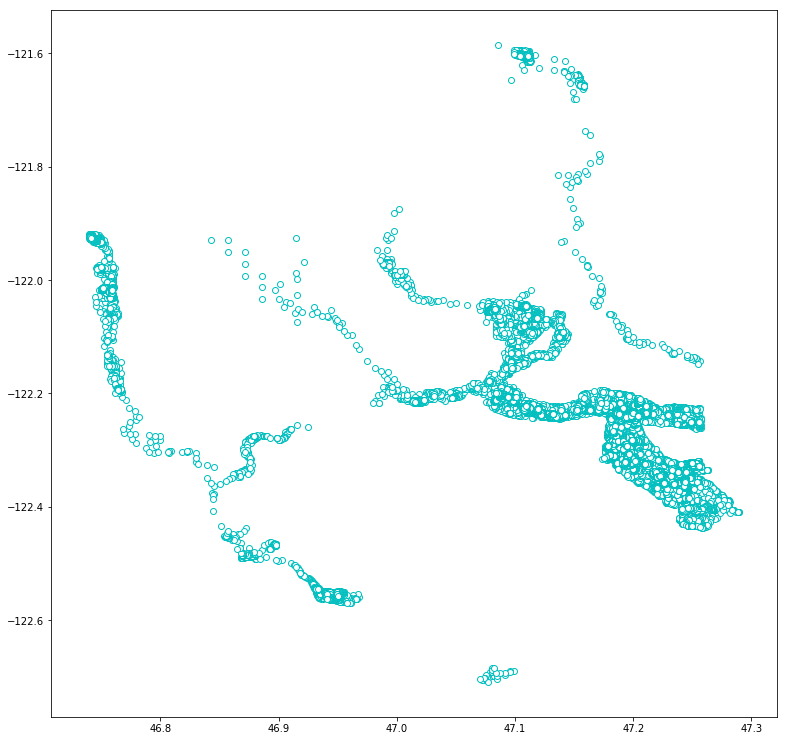

In [24]:
#check the shape of the lat/long to make sure the layer join worked.
plt.figure(figsize=(13, 13))
plt.scatter(danger['latitude'], danger['longitude'], c='w', edgecolor ='c');

In [15]:
danger['is_threatened'] = True

In [16]:
danger.head(2)

,OBJECTID,CASE_1,CASE_2,CASE_3,SYMBOL,TIME_ZONE,latitude,longitude,is_threatened
0,53,Y,NaN,NaN,1,D,47.08061,-122.68482,True
1,53,Y,NaN,NaN,1,D,47.08191,-122.69244,True


In [52]:
danger.shape

(28952, 9)

In [44]:
#rename to make column names identical for future merging
danger =danger.rename(columns={'latitude':'Latitude',
                      'longitude':'Longitude'})
danger.head(2)

,OBJECTID,CASE_1,CASE_2,CASE_3,SYMBOL,TIME_ZONE,Latitude,Longitude,is_threatened
0,53,Y,NaN,NaN,1,D,47.08061,-122.68482,True
1,53,Y,NaN,NaN,1,D,47.08191,-122.69244,True


In [91]:
danger.CASE_1.value_counts()

1.0    28928
0.0       24
Name: CASE_1, dtype: int64

In [77]:
danger['CASE_1'] =danger['CASE_1'].map({'Y': 1})

In [92]:
danger.CASE_2.value_counts()

Series([], Name: CASE_2, dtype: int64)

In [82]:
danger['CASE_2'] =danger['CASE_2'].map({'Y': 1})

In [93]:
danger.CASE_3.value_counts()

1.0    12
Name: CASE_3, dtype: int64

In [81]:
danger['CASE_3'] =danger['CASE_3'].map({'Y': 1})

In [98]:
danger.isna().sum()

OBJECTID          0
CASE_1            0
CASE_2            0
CASE_3            0
SYMBOL            0
TIME_ZONE        49
Latitude         23
Longitude        23
is_threatened     0
dtype: int64

In [84]:
danger['CASE_1'].fillna(value =0, inplace=True)

In [96]:
danger['CASE_2'].fillna(value=0, inplace=True)

In [97]:
danger['CASE_3'].fillna(value=0, inplace=True)

In [95]:
danger['CASE_1'].value_counts()

1.0    28928
0.0       24
Name: CASE_1, dtype: int64

In [101]:
#drop column time zone
danger.drop(columns=['TIME_ZONE', 'SYMBOL', 'OBJECTID'], inplace=True)

In [103]:
#drop remaining null rows
danger.dropna(inplace=True)

In [104]:
danger.shape

(28929, 6)

In [116]:
danger.is_threatened.value_counts()

True    28929
Name: is_threatened, dtype: int64

# Merge dfs

In [72]:
#import clean df
clean =pd.read_csv('../data/Tax_Parcels_Trimmed.csv')

In [73]:
clean.shape

(327319, 20)

In [127]:
#merge imported cleaned df and the cleaned 'threatened'df
threat =pd.merge(clean, danger, how='left', on=['Longitude', 'Latitude'])
threat.head()

,TaxParcelNumber,TaxParcelType,TaxParcelUnitType,EditDate,Delivery_Address,City_State,Zipcode,Site_Address,Land_Acres,Land_Value,...,X_Coordinate,Y_Coordinate,Longitude,Latitude,Shape__Area,Shape__Length,CASE_1,CASE_2,CASE_3,is_threatened
0,21247005,Base Parcel,,1998-07-24T00:00:00.000Z,UNKNOWN PARTY ADDRESS,"UNKNOWN CITY, WA",NaN,XXX 34TH STCT NW,0.0000,0,...,1.081288e+06,721057.9755,-122.75325,47.28867,38758.018311,1141.837123,NaN,NaN,NaN,NaN
1,21247006,Base Parcel,NaN,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3211 MCEWAN RD NW,7.6300,364000,...,1.080163e+06,720458.5894,-122.75771,47.28694,345604.122986,3638.028072,NaN,NaN,NaN,NaN
2,21247007,Base Parcel,,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3209 MCEWAN RD NW,2.8700,251400,...,1.081042e+06,720375.4829,-122.75416,47.28678,133528.313354,2089.154656,NaN,NaN,NaN,NaN
3,21247700,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,XXX Undetermined Situs,1.3174,33900,...,1.080063e+06,720851.0629,-122.75815,47.28801,60097.457336,1243.548915,NaN,NaN,NaN,NaN
4,21247701,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,16407 33RD STCT NW,2.7100,251200,...,1.080827e+06,720849.5547,-122.75508,47.28806,122531.592957,2293.364640,NaN,NaN,NaN,NaN


In [128]:
threat.shape

(327659, 24)

In [129]:
#for some reason drops ~15,000 rows.
threat['is_threatened'].value_counts()

True    15345
Name: is_threatened, dtype: int64

In [108]:
threat['is_threatened'].isna().sum()

312314

In [155]:
#export merged dataframe
threat.to_csv('../data/danger_tax_robinson.csv', index=False)

# EDA

In [132]:
data =pd.read_csv('../data/danger_tax_robinson.csv')

In [135]:
#mask is_threatened to check
data['is_threatened'].value_counts()

True    15345
Name: is_threatened, dtype: int64

In [140]:
allthreat = data[data['is_threatened'] ==True]

In [141]:
allthreat.shape

(15345, 24)

In [130]:
#replot the threatened observation to see why we lost some.
#plt.figure(figsize=(13, 13))
#plt.scatter(threat['Latitude'], threat['Longitude'], c='w', edgecolor ='c')
#plt.title('Latitude v Longitude');

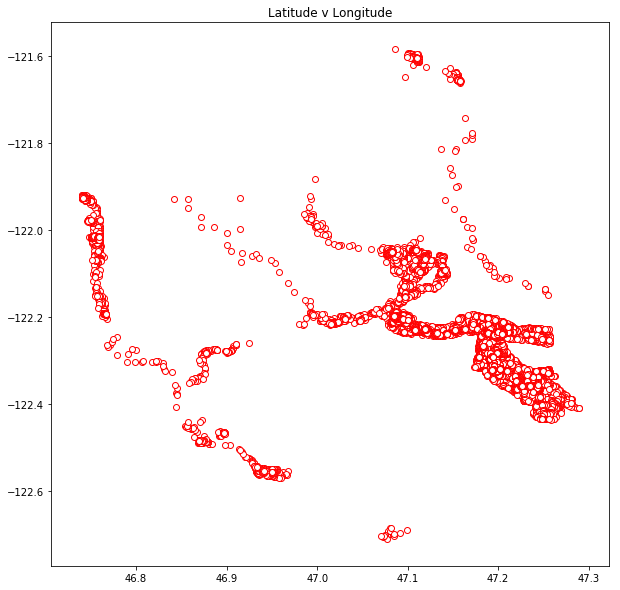

In [142]:
plt.figure(figsize=(10, 10))
plt.scatter(allthreat['Latitude'], allthreat['Longitude'], c='w', edgecolor ='r')
plt.title('Latitude v Longitude');

In [147]:
#mask case 1 to plot
case1 = data[data['CASE_1'] ==True]
case1.shape

(15331, 24)

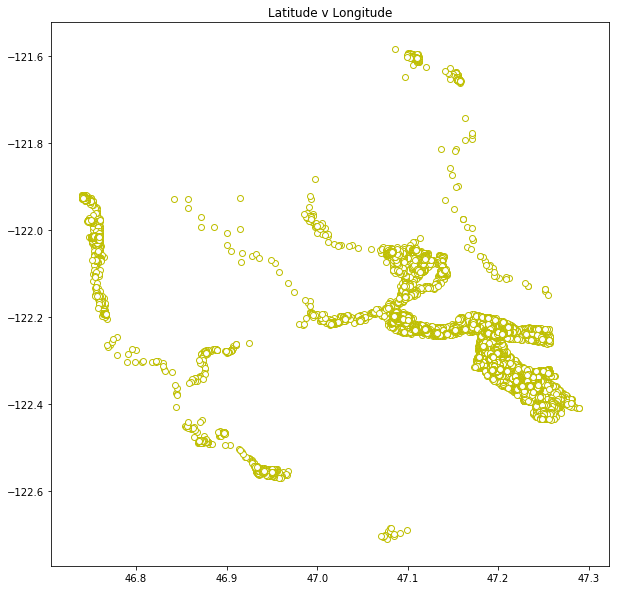

In [146]:
#try plotting the cases to visualize
plt.figure(figsize=(10, 10))
plt.scatter(case1['Latitude'], case1['Longitude'], c='w', edgecolor ='y')
plt.title('Latitude v Longitude');

In [151]:
#case 1 is the only one with information
#mask case 1 to plot
case3 = data[data['CASE_3'] ==True]
case3.shape

(2, 24)

In [154]:
#plt.figure(figsize=(10, 10))
#plt.scatter(case3['Latitude'], case3['Longitude'], c='w', edgecolor ='yk')
#plt.title('Latitude v Longitude');